Bar Plots

Bar Plots for Hyperband Results on AlexNet

path /home/misgana/Workspace/AutoDA/notebooks/../../AutoData
[0.007499999999999951]
[0.007499999999999951, 0.007333333333333303]
[0.007499999999999951, 0.007333333333333303, 0.007583333333333386]
[0.007499999999999951, 0.007333333333333303, 0.007583333333333386, 0.008083333333333331]
[0.007499999999999951, 0.007333333333333303, 0.007583333333333386, 0.008083333333333331, 0.008083333333333331]
[0.011199999999999988]
[0.011199999999999988, 0.011199999999999988]
[0.011199999999999988, 0.011199999999999988, 0.011900000000000022]
[0.011199999999999988, 0.011199999999999988, 0.011900000000000022, 0.010700000000000043]
[0.011199999999999988, 0.011199999999999988, 0.011900000000000022, 0.010700000000000043, 0.010499999999999954]
[0.008900000000000019]
[0.008900000000000019, 0.006800000000000028]
[0.008900000000000019, 0.006800000000000028, 0.008099999999999996]
[0.008900000000000019, 0.006800000000000028, 0.008099999999999996, 0.007600000000000051]
[0.008900000000000019, 0.006800000000000028, 

ValueError: arrays must all be same length

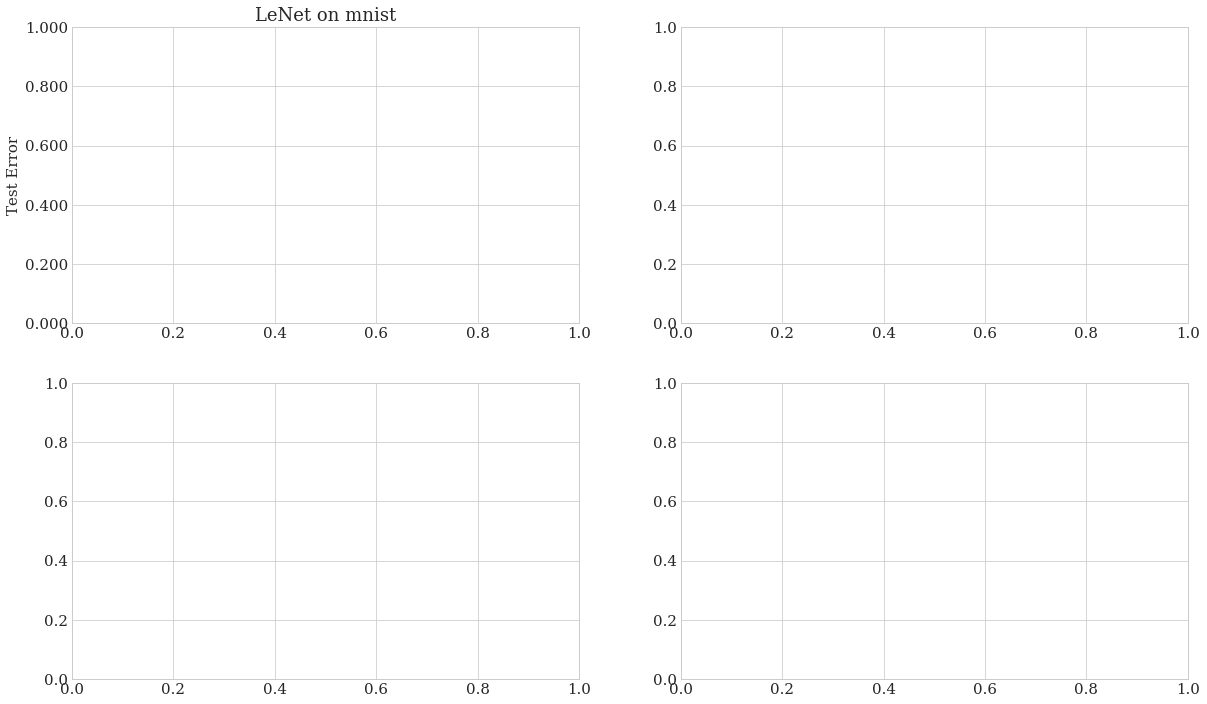

In [2]:
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np

import json
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)

from itertools import product
from glob import glob
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.ticker import FormatStrFormatter
import ConfigSpace as CS
#from autoda.data_augmentation import ImageAugmentation
#from fanova import fANOVA
#from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

path = path_join(abspath("."), "..", "..", "AutoData")
print("path", path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

benchmarks = ["LeNet", "AlexNet"]
optimizers = ("BOHB",)
datasets = ("mnist", "cifar10", "cifar100",)
markers = (
    "best_config", 
    "default", 
    "no_augment",
    "random"
)


def read_data(dataset, benchmark="AlexNet", markers=markers):
    base_path = path_join(path, dataset, "BOHB", benchmark)
    filenames = OrderedDict(tuple(
        (marker, sorted(glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker, dataset=dataset))))
        for marker in markers
    ))
    
    def read_files(marker_filenames):
        data = []
        for filename in marker_filenames:
            with open(filename, "r") as f:
                json_content = json.load(f)
                try:
                    data.append(json_content["best_run_info"]["info"]["validation_error"])
                except KeyError:  # standard does not have "info" key
                    data.append(json_content["test_error"])
            print(data)
        return data

    data = OrderedDict(tuple(
        (marker, read_files(marker_filenames))
        for marker, marker_filenames in filenames.items()
    ))
    print(data)
    return data


data = OrderedDict(tuple(
    ((dataset, benchmark), list(read_data(dataset=dataset, benchmark=benchmark).values()))
    for dataset, benchmark in product(datasets, benchmarks)
))

num_plots = 4# len(list(data.keys()))
print(num_plots)
num_plots_side_by_side = len(benchmarks)

num_rows = num_plots // num_plots_side_by_side 
num_columns = num_plots_side_by_side

#f, axes = plt.subplots(num_rows, num_columns, sharex=False, figsize=(20, 12))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, sharex=False, figsize=(20, 12))
indices = product(range(num_rows), range(num_columns))
axes_iterator = iter(axes)

for (dataset, benchmark), results in data.items():
    if not(all(result for result in results)):
        continue
    row, column = next(indices)
    axis = axes[row][column]
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axis.set_ylabel("Test Error")
    axis.set_title("{benchmark} on {dataset}".format(benchmark=benchmark, dataset=dataset))
    sns.barplot(data=pd.DataFrame({marker: marker_data for marker, marker_data in zip(markers, results)}), ax=axis)
    extent = axis.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(path_join(path, "plots", "{}on{}.png".format(benchmark,dataset)), bbox_inches=extent.expanded(1.26, 1.2))

Model-based Hyperband results on cifar10 and AlexNet

In [ ]:

   
path = path_join(abspath("."), "..", "..", "AutoData")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

optimizers = ["hyperband", "BOHB"]
datasets = ["cifar10", "cifar100"]

BOHB = path_join(path, ("cifar10/BOHB"))
print(hyperband)
best_config  = []
standard = []
for d in datasets:
    p = dict()

    n_runs = 5
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            best_config_path = "AlexNet/best_config_hyperband_%s_%d.json" % (d, i)
            filename = path_join(BOHB, best_config_path)
            print(filename)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        best_config.append(res["best_run_info"]["info"]["validation_error"])
        try:
            from os.path import abspath, join as path_join
            standard_path = "AlexNet/standard/standard_hyperband_%s_%d.json" % (d, i)
            filename2 = path_join(BOHB, standard_path)
            with open(filename2, "r") as f:
                res2 = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        standard.append(res2["best_run_info"]["validation_error"])
